In [1]:
# Parse PDF document and export to different formats
# For starters, export to JSON format

In [3]:
# !pip install mistralai python-dotenv


In [39]:
import os
import re
from dotenv import load_dotenv
from mistralai import Mistral
import markdown

load_dotenv()

api_key = os.environ["MISTRAL_API_KEY"]
client = Mistral(api_key=api_key)

In [15]:
# Boarding Pass
boarding_pass = "/Users/siddheshkanawade/Downloads/IndigoWebCheckin-Hariyana.pdf"

In [16]:
uploaded_pdf = client.files.upload(
    file={
        "file_name": "uploaded_file.pdf",
        "content": open(boarding_pass, "rb"),
    },
    purpose="ocr"
)  

In [17]:
signed_url = client.files.get_signed_url(file_id=uploaded_pdf.id)

In [23]:
ocr_response = client.ocr.process(
    model="mistral-ocr-latest",
    document={
        "type": "document_url",
        "document_url": signed_url.url,
    },
    include_image_base64=True
)

In [34]:
# <img src="data:image/png;base64,{base64_string}" alt="Base64 Image">

images = [] # {page_number: {image_name: img_src}}

for ind, page in enumerate(ocr_response.pages):
    images.append({})
    for image in page.images:
        img_tag = f'<img src="data:image/png;base64,{image.image_base64}" alt="image-{image.id}">'
        images[ind][image.id] = img_tag  # Store the img tag instead of raw Base64

In [35]:
markdown_text = ocr_response.dict()['pages'][0]['markdown']

/var/folders/3z/cl9z590d6tjc0r37kqwcbjf80000gn/T/ipykernel_77892/3988381974.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  markdown_text = ocr_response.dict()['pages'][0]['markdown']


In [36]:
for page_images in images:
    for image_id, img_tag in page_images.items():
        pattern = rf"!\[.*?\]\(.*?{image_id}.*?\)"  # Match ![any-text](image-id...)
        markdown_text = re.sub(pattern, img_tag, markdown_text)

In [40]:
# Convert Markdown to HTML
html_content = markdown.markdown(markdown_text)

# Save HTML file
html_filename = "output.html"
with open(html_filename, "w", encoding="utf-8") as file:
    file.write(html_content)

/var/folders/3z/cl9z590d6tjc0r37kqwcbjf80000gn/T/ipykernel_77892/770858036.py:1: PydanticDeprecatedSince20: The `dict` method is deprecated; use `model_dump` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  ocr_response.dict()['pages']


[{'index': 0,
  'markdown': '![img-0.jpeg](img-0.jpeg)\n\n# Dangerous Goods \\& Restricted Articles \n\nIf you have any dangerous goods or restricted articles please declare them, carrying these objects may be an offense \\& may result in prosecution.\n\nNot allowed | $\\square$ These items are Dangerous Goods and are not permitted to be carried as hand baggage or check in baggage.\n![img-1.jpeg](img-1.jpeg)',
  'images': [{'id': 'img-0.jpeg',
    'top_left_x': 142,
    'top_left_y': 123,
    'bottom_right_x': 1538,
    'bottom_right_y': 1478,
    'image_base64': ''},
   {'id': 'img-1.jpeg',
    'top_left_x': 158,
    'top_left_y': 1779,
    'bottom_right_x': 1487,
    'bottom_right_y': 2002,
    'image_base64': ''}],
  'dimensions': {'dpi': 200, 'height': 2339, 'width': 1653}},
 {'index': 1,
  'markdown': "# Airport Guide \n\n![img-2.jpeg](img-2.jpeg)\n\nFirst things first\n\nPRINT AND CARRY YOUR BOARDING PASS ON THE DAY OF THE DEPARTURE.\n\nSTEP 4\n$\\square$\n\nDeposit your baggage\
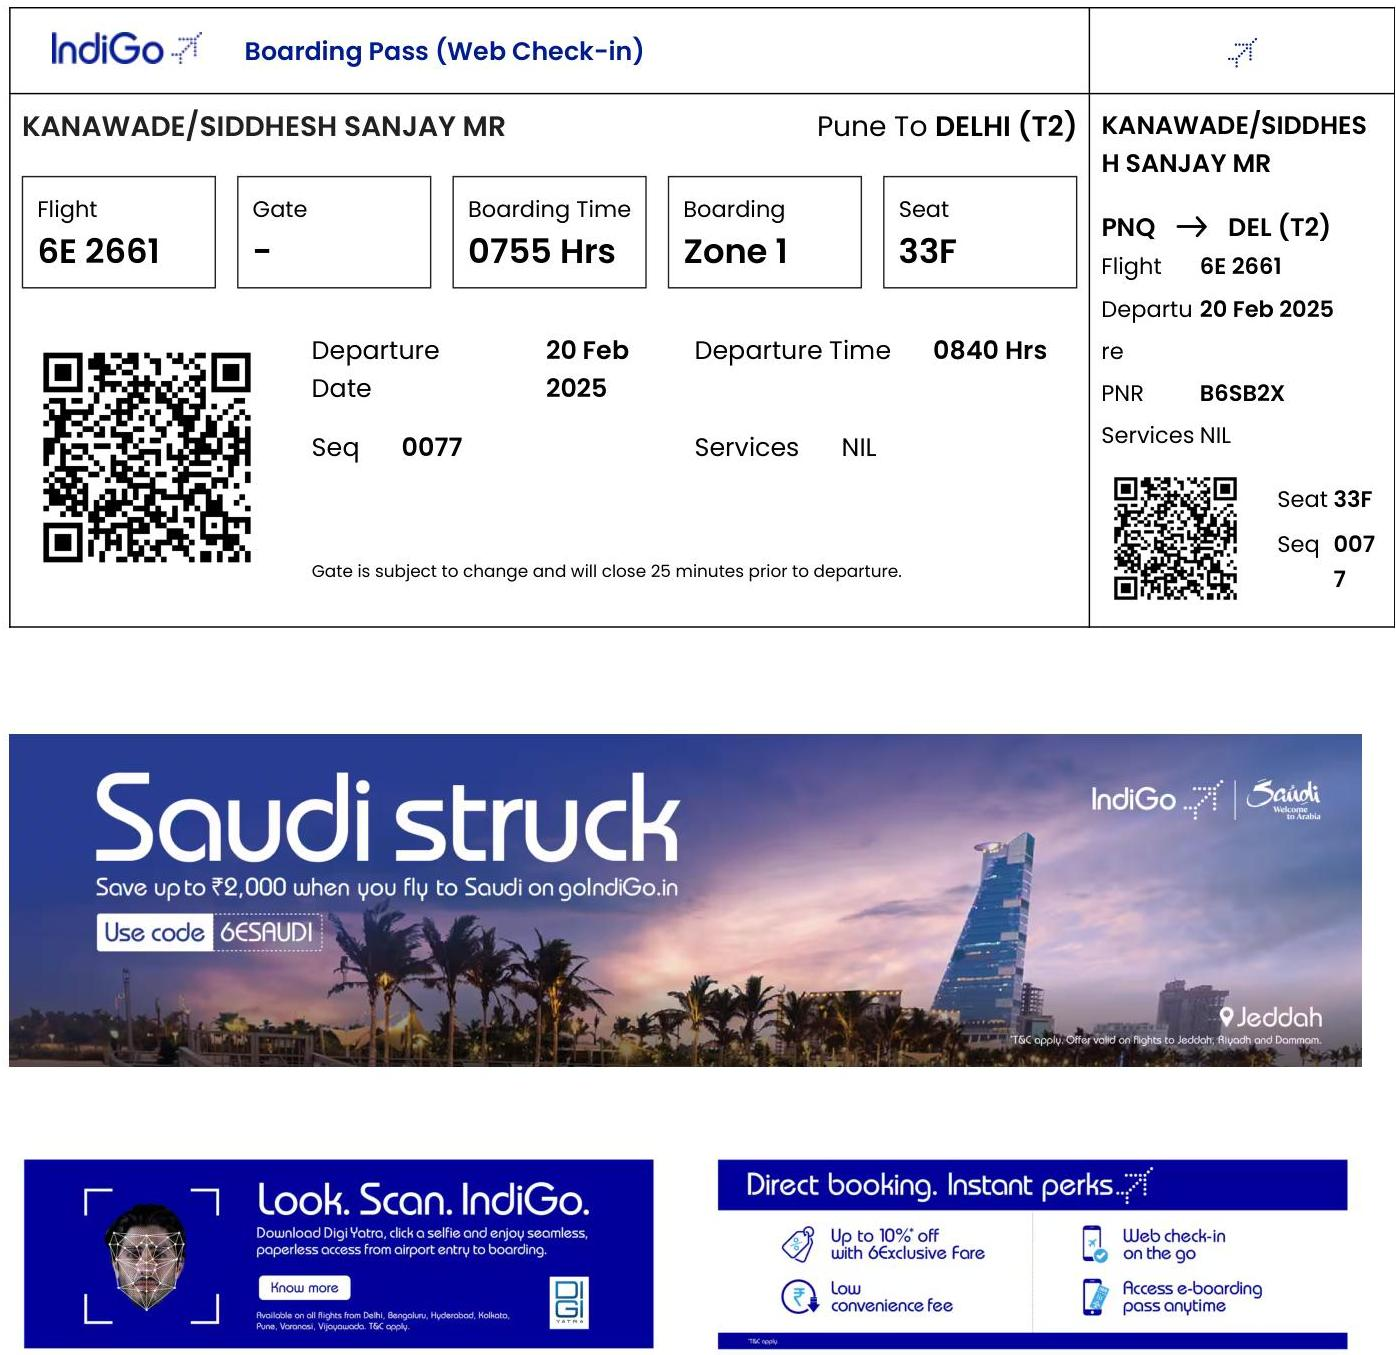
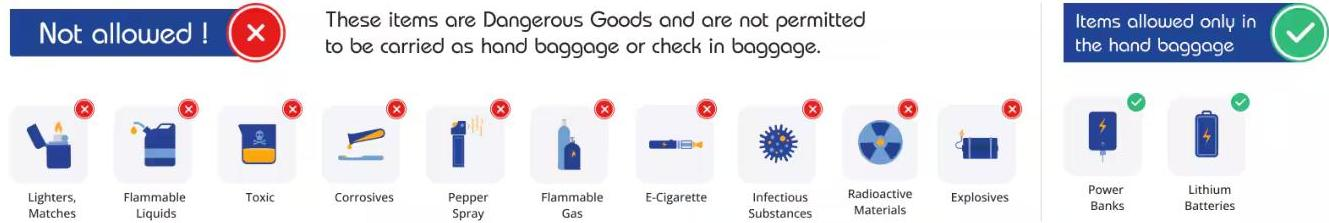
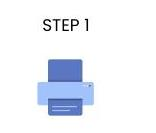
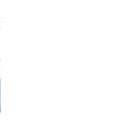
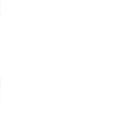
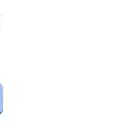

In [24]:
ocr_response.dict()['pages']